# DATA IMPORTATION AND PROCESSING

In [1]:
#Importing data processing packages
import pandas as pd
import itertools

In [2]:
#Defining data path
dataset_path = r"C:\Users\Achor\Downloads\dataset.xlsx"

In [3]:
#Reading the dataset from Excel files
dataset = pd.read_excel(dataset_path, sheet_name = 'DATASET', keep_default_na=False)

In [4]:
#Inspecting data
dataset.head()

,doc_no,annotator,struggle,cluster_expert,cluster_expert_merged,cluster_auto,struggle_original,OT,reflection_candidates,reflection_annotation,...,reframing_annotation,reframing_from_expert,comfort_candidates,comfort_annotation,comfort_from_expert,suggestion_candidates,suggestion_annotation,suggestion_from_expert,reduced_embeddings,full_embeddings
0,1,1,When dieting I often find it hard to track my ...,CALORIE_COUNTING,DIET_PLAN_ISSUES,find_calorie_time,When dieting I often find it hard to track my ...,N,"So, do you mean that tracking your calorie int...",Y ### Y ### Y ### Y ### Y ### Y ### Y ### Y ##...,...,Y ### Y ### Y ### Y ### Y ### Y ### Y ### Y ##...,N/A,It can happen to anyone to find it difficult t...,Y ### Y ### Y ### Y ### Y ### Y ### Y ### Y ##...,N/A,"Starting from tomorrow, you could try tracking...",N ### Y ### Y ### N ### Y ### N ### Y ### Y ##...,N/A,-0.38553035 ### 9.694216 ### 8.311511,-0.04257814213633537 ### 0.045637574046850204 ...
1,2,1,Saying no to alcohol in social settings. I usu...,SOCIAL,SOCIAL,feel_alcohol_friend,Saying no to alcohol in social settings. I usu...,N,Do you mean that saying no to alcohol in socia...,Y ### Y ### Y ### Y ### Y ### Y ### Y ### Y ##...,...,Y ### Y ### Y ### Y ### Y ### Y ### Y ### Y ##...,N/A,It's understandable to struggle with saying no...,Y ### Y ### Y ### Y ### Y ### Y ### Y ### Y ##...,N/A,Starting from tomorrow you could try setting a...,Y ### Y ### Y ### Y ### Y ### Y ### Y ### Y ##...,N/A,1.6147285 ### 12.11944 ### 6.081849,0.021132370457053185 ### -0.020406601950526237...
2,3,1,Healthy food is expensive and earning a middle...,SITUATIONAL,SITUATIONAL,feel_food_junk,Healthy food is expensive and earning a middle...,N,Do you mean that healthy food options are too ...,Y ### Y ### Y ### Y ### Y ### Y ### Y ### Y ##...,...,Y ### Y ### Y ### Y ### Y ### Y ### Y ### Y ##...,N/A,It can happen to feel tempted to grab fast foo...,Y ### Y ### Y ### Y ### Y ### Y ### Y ### Y ##...,N/A,"Starting from tomorrow, you could make a list ...",N ### Y ### Y ### Y ### N ### Y ### Y ### Y ##...,N/A,-0.74341005 ### 14.221862 ### 9.163124,-0.0352167934179306 ### 0.06300564110279083 ##...
3,4,1,Working out is hard for me because I'm used to...,MOTIVATION,MOTIVATION,feel_time_gym_day,Working out is hard for me because Im used to ...,N,"So, do you mean you have trouble creating a ne...",Y ### Y ### Y ### Y ### Y ### Y ### Y ### Y ##...,...,Y ### Y ### Y ### Y ### Y ### Y ### Y ### Y ##...,N/A,It's understandable to find it difficult to ad...,Y ### Y ### Y ### Y ### Y ### Y ### Y ### Y ##...,N/A,"It could be helpful to set small, achievable g...",Y ### Y ### Y ### Y ### Y ### Y ### Y ### Y ##...,N/A,4.136178 ### 9.765074 ### 7.860414,0.022051161155104637 ### -0.0497511550784111 #...
4,5,1,When I see pizza I always want to buy and I en...,CRAVING_HABIT,CRAVING_HABIT,feel_food_junk,When I see pizza I always want to buy and I en...,N,"So, are you saying that you have a hard time r...",Y ### Y ### Y ### Y ### Y ### Y ### Y ### Y ##...,...,Y ### Y ### Y ### Y ### Y ### Y ### Y ### Y ##...,N/A,Sometimes it can happen that we crave certain ...,Y ### Y ### Y ### Y ### Y ### N ### Y ### Y ##...,N/A,"Starting from tomorrow, you could make a plan ...",N ### Y ### Y ### N ### Y ### Y ### Y ### Y ##...,N/A,-1.5897965 ### 13.701472 ### 7.329277,-0.009577570483088493 ### 0.09480103105306625 ...


In [5]:
# splitting lists with ### separator and converting relevant columns to strings
for col in dataset.columns:
    if type(dataset[col][0]) == str:
        if dataset[col].str.contains(" ### ").any():
            new_col = dataset[col].str.split(" ### ")
            dataset[col] = new_col

In [6]:
#Inspecting dataset
dataset.head()

,doc_no,annotator,struggle,cluster_expert,cluster_expert_merged,cluster_auto,struggle_original,OT,reflection_candidates,reflection_annotation,...,reframing_annotation,reframing_from_expert,comfort_candidates,comfort_annotation,comfort_from_expert,suggestion_candidates,suggestion_annotation,suggestion_from_expert,reduced_embeddings,full_embeddings
0,1,1,When dieting I often find it hard to track my ...,CALORIE_COUNTING,DIET_PLAN_ISSUES,find_calorie_time,When dieting I often find it hard to track my ...,N,"[So, do you mean that tracking your calorie in...","[Y, Y, Y, Y, Y, Y, Y, Y, Y, Y]",...,"[Y, Y, Y, Y, Y, Y, Y, Y, Y, Y]",[N/A],[It can happen to anyone to find it difficult ...,"[Y, Y, Y, Y, Y, Y, Y, Y, Y, Y]",[N/A],"[Starting from tomorrow, you could try trackin...","[N, Y, Y, N, Y, N, Y, Y, Y, Y]",[N/A],"[-0.38553035, 9.694216, 8.311511]","[-0.04257814213633537, 0.045637574046850204, 0..."
1,2,1,Saying no to alcohol in social settings. I usu...,SOCIAL,SOCIAL,feel_alcohol_friend,Saying no to alcohol in social settings. I usu...,N,[Do you mean that saying no to alcohol in soci...,"[Y, Y, Y, Y, Y, Y, Y, Y, Y, Y]",...,"[Y, Y, Y, Y, Y, Y, Y, Y, Y, Y]",[N/A],[It's understandable to struggle with saying n...,"[Y, Y, Y, Y, Y, Y, Y, Y, Y, Y]",[N/A],[Starting from tomorrow you could try setting ...,"[Y, Y, Y, Y, Y, Y, Y, Y, Y, Y]",[N/A],"[1.6147285, 12.11944, 6.081849]","[0.021132370457053185, -0.020406601950526237, ..."
2,3,1,Healthy food is expensive and earning a middle...,SITUATIONAL,SITUATIONAL,feel_food_junk,Healthy food is expensive and earning a middle...,N,[Do you mean that healthy food options are too...,"[Y, Y, Y, Y, Y, Y, Y, Y, Y, Y]",...,"[Y, Y, Y, Y, Y, Y, Y, Y, Y, Y]",[N/A],[It can happen to feel tempted to grab fast fo...,"[Y, Y, Y, Y, Y, Y, Y, Y, Y, Y]",[N/A],"[Starting from tomorrow, you could make a list...","[N, Y, Y, Y, N, Y, Y, Y, Y, Y]",[N/A],"[-0.74341005, 14.221862, 9.163124]","[-0.0352167934179306, 0.06300564110279083, 0.0..."
3,4,1,Working out is hard for me because I'm used to...,MOTIVATION,MOTIVATION,feel_time_gym_day,Working out is hard for me because Im used to ...,N,"[So, do you mean you have trouble creating a n...","[Y, Y, Y, Y, Y, Y, Y, Y, Y, Y]",...,"[Y, Y, Y, Y, Y, Y, Y, Y, Y, Y]",[N/A],[It's understandable to find it difficult to a...,"[Y, Y, Y, Y, Y, Y, Y, Y, Y, Y]",[N/A],"[It could be helpful to set small, achievable ...","[Y, Y, Y, Y, Y, Y, Y, Y, Y, Y]",[N/A],"[4.136178, 9.765074, 7.860414]","[0.022051161155104637, -0.0497511550784111, 0...."
4,5,1,When I see pizza I always want to buy and I en...,CRAVING_HABIT,CRAVING_HABIT,feel_food_junk,When I see pizza I always want to buy and I en...,N,"[So, are you saying that you have a hard time ...","[Y, Y, Y, Y, Y, Y, Y, Y, Y, Y]",...,"[Y, Y, Y, Y, Y, Y, Y, Y, Y, Y]",[N/A],[Sometimes it can happen that we crave certain...,"[Y, Y, Y, Y, Y, N, Y, Y, Y, Y]",[N/A],"[Starting from tomorrow, you could make a plan...","[N, Y, Y, N, Y, Y, Y, Y, Y, Y]",[N/A],"[-1.5897965, 13.701472, 7.329277]","[-0.009577570483088493, 0.09480103105306625, 0..."


## DROP THE 'NOT_APPLICABLE' CLUSTERS

In [7]:
# Counting the number of rows where 'cluster_expert_merged' is 'NOT_APPLICABLE'
count_not_applicable = dataset[dataset['cluster_expert_merged'] == 'NOT_APPLICABLE'].shape[0]

# Using query to filter out 'NOT_APPLICABLE'
filtered_dataset = dataset.query("cluster_expert_merged != 'NOT_APPLICABLE'")
filtered_dataset.head()

# Calculating the number of rows dropped
rows_dropped = count_not_applicable

# Calculating the number of rows remaining
rows_remaining = filtered_dataset.shape[0]

# Outputing the counts
print("Number of rows dropped:", rows_dropped)
print("Number of rows remaining:", rows_remaining)

Number of rows dropped: 98
Number of rows remaining: 2322


## Install Important Packages

In [10]:
!pip install wordcloud

  Using cached wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.3-cp311-cp311-win_amd64.whl (300 kB)


## RFLECTION CANDIDATES EXPLORATION

In [8]:
# Reading the reflection candidates into a list with bespoke names
reflective_statements = []
reflective_labels = []
for index, row in filtered_dataset.iterrows():
    for statement, annotation in zip(row['reflection_candidates'], row['reflection_annotation']):
        reflective_statements.append(statement)
        reflective_labels.append(1 if annotation == 'Y' else 0)

In [9]:
reflective_df = pd.DataFrame({
    'Statement': reflective_statements,
    'Label': reflective_labels
})

# Converting numeric labels back to 'Y' and 'N' for clarity
reflective_df['Label'] = reflective_df['Label'].apply(lambda x: 'Y' if x == 1 else 'N')

# Counting the number of statements in each category
category_counts = reflective_df['Label'].value_counts()
print("Number of statements in each category:")
print(category_counts)

# Printing two samples for each category
print("\nTwo samples for each category:")

for label in reflective_df['Label'].unique():
    print(f"\nCategory {label} samples:")
    samples = reflective_df[reflective_df['Label'] == label].sample(n=2, random_state=1)
    for i, row in samples.iterrows():
        print(f"- {row['Statement']}")

Number of statements in each category:
Label
Y    20177
N     3043
Name: count, dtype: int64

Two samples for each category:

Category Y samples:
- Do you mean that it is difficult to afford the ingredients for healthy meals?
- So, do you mean that you find it challenging to control your intake of pastries high in chocolate during college breaks?

Category N samples:
-  Are you saying that the unhealthy food choices you make during stressful times are detrimental to your overall health?
- Are you saying that it's difficult for you to say no to social gatherings with your family and friends because they involve unhealthy food and alcohol?


In [11]:
# Separating safe and unsafe statements
safe_statements = [stmt for stmt, label in zip(reflective_statements, reflective_labels) if label == 1]
unsafe_statements = [stmt for stmt, label in zip(reflective_statements, reflective_labels) if label == 0]

### GENERATING WORD CLOUD

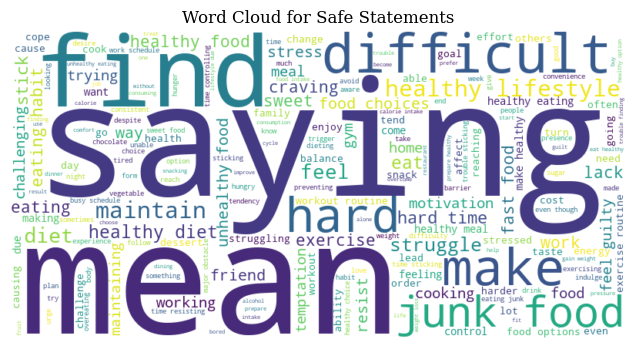

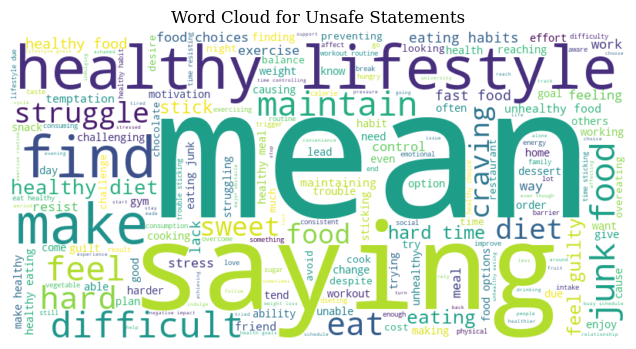

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_word_cloud(text_data, title):
    # Generating a word cloud image
    wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(" ".join(text_data))
    
    # Displaying the generated image:
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis("off")
    plt.show()

# Generating word cloud for safe statements
generate_word_cloud(safe_statements, 'Word Cloud for Safe Statements')

# Generating word cloud for unsafe statements
generate_word_cloud(unsafe_statements, 'Word Cloud for Unsafe Statements')

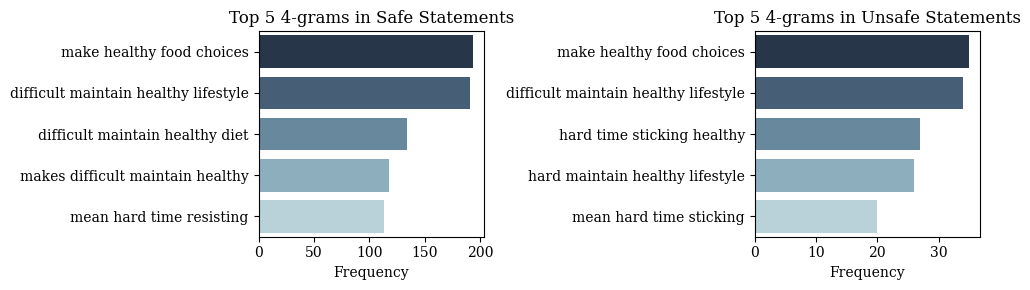

In [41]:
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

# Function to extract and visualize top 5 4-grams
def visualize_top_n_grams(statements, title, n=5, ngram_range=(4, 4), ax=None):
    # Initialize CountVectorizer with the appropriate n-gram range and stop word removal
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(statements)
    bag_of_words = vectorizer.transform(statements)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    top_n_words = words_freq[:n]
    top_n_words_df = pd.DataFrame(top_n_words, columns=['4-gram', 'Frequency'])
    
    # Creating a custom blue color palette that varies from dark to light
    color_palette = sns.cubehelix_palette(start=2.8, rot=-0.1, dark=0.2, light=0.8, n_colors=n, reverse=True)

    # Visualization using seaborn
    sns.barplot(x='Frequency', y='4-gram', data=top_n_words_df, palette=color_palette, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Frequency')
    ax.set_ylabel('')

# Setting up a figure
plt.figure(figsize=(10, 3))  # Adjust overall figure size
plt.rc('font', family='serif')  # Set font family to serif for sharper text

# Creating subplot axes
ax1 = plt.subplot(1, 2, 1)  # First subplot
ax2 = plt.subplot(1, 2, 2)  # Second subplot

# Generating visualizations for safe and unsafe statements
visualize_top_n_grams(safe_statements, "Top 5 4-grams in Safe Statements", ax=ax1)
visualize_top_n_grams(unsafe_statements, "Top 5 4-grams in Unsafe Statements", ax=ax2)

plt.tight_layout() 
plt.show()

## REFRAMING CANDIDATES EXPLORATION

In [37]:
# Reading the reframing candidates into a list with bespoke names
reframing_statements = []
reframing_labels = []
for index, row in filtered_dataset.iterrows():
    for statement, annotation in zip(row['reframing_candidates'], row['reframing_annotation']):
        reframing_statements.append(statement)
        reframing_labels.append(1 if annotation == 'Y' else 0)

In [38]:
reframing_df = pd.DataFrame({
    'Statement': reframing_statements,
    'Label': reframing_labels
})

# Converting numeric labels back to 'Y' and 'N' for clarity
reframing_df['Label'] = reframing_df['Label'].apply(lambda x: 'Y' if x == 1 else 'N')

# Counting the number of statements in each category
category_counts = reframing_df['Label'].value_counts()
print("Number of statements in each category for Reframing Candidates:")
print(category_counts)

# Printing two samples for each category
print("\nTwo samples for each category in Reframing Candidates:")

for label in reframing_df['Label'].unique():
    print(f"\nCategory {label} samples:")
    samples = reframing_df[reframing_df['Label'] == label].sample(n=2, random_state=1)
    for i, row in samples.iterrows():
        print(f"- {row['Statement']}")

Number of statements in each category for Reframing Candidates:
Label
Y    19527
N     3693
Name: count, dtype: int64

Two samples for each category in Reframing Candidates:

Category Y samples:
- A more positive way to think about this could be that you can use this as an opportunity to learn more about nutrition and how to make healthy food choices.
- How about seeing it this way for a minute: Every time you resist the temptation to eat junk food, you are building your willpower and self-discipline.

Category N samples:
- A more positive way to think about this could be: Instead of viewing it as a setback, you're taking time to listen to your body and what it needs.
- A more positive way to think about this could be that investing in healthy food now can lead to long-term health benefits and savings on medical expenses.


### GENERATING WORD CLOUD

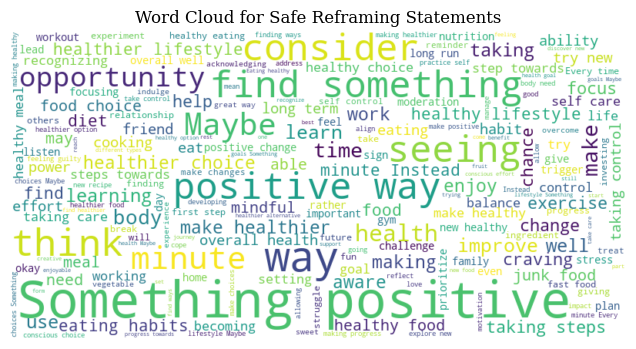

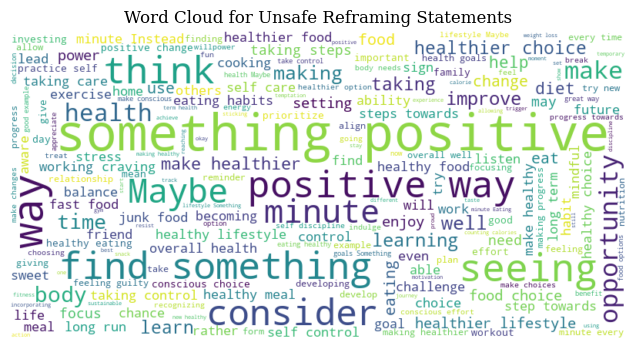

In [40]:
# Filtering safe and unsafe reframing statements
safe_reframing_statements = [stmt for stmt, label in zip(reframing_statements, reframing_labels) if label == 1]
unsafe_reframing_statements = [stmt for stmt, label in zip(reframing_statements, reframing_labels) if label == 0]

def generate_word_cloud(text_data, title):
    # Generating a word cloud image
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(text_data))
    
    # Displaying the generated image:
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis("off")
    plt.show()

# Generating word cloud for safe reframing statements
generate_word_cloud(safe_reframing_statements, 'Word Cloud for Safe Reframing Statements')

# Generating word cloud for unsafe reframing statements
generate_word_cloud(unsafe_reframing_statements, 'Word Cloud for Unsafe Reframing Statements')

### VISUALIZING TOP-5 4-GRAMS

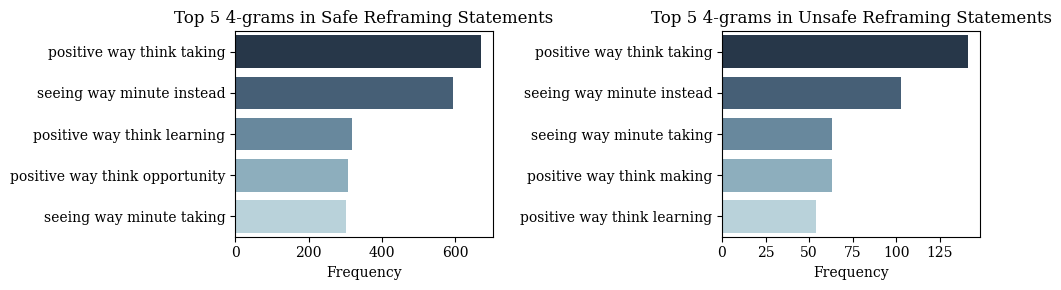

In [43]:
# Function to extract and visualize top 5 4-grams
def visualize_top_n_grams(statements, title, n=5, ngram_range=(4, 4), ax=None):
    # Initialize CountVectorizer with the appropriate n-gram range and stop word removal
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(statements)
    bag_of_words = vectorizer.transform(statements)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    top_n_words = words_freq[:n]
    top_n_words_df = pd.DataFrame(top_n_words, columns=['4-gram', 'Frequency'])
    
    # Creating a custom blue color palette that varies from dark to light
    color_palette = sns.cubehelix_palette(start=2.8, rot=-0.1, dark=0.2, light=0.8, n_colors=n, reverse=True)

    # Visualization using seaborn
    sns.barplot(x='Frequency', y='4-gram', data=top_n_words_df, palette=color_palette, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Frequency')
    ax.set_ylabel('')


# Setting up a figure
plt.figure(figsize=(10, 3))  # Adjust overall figure size for better visibility
plt.rc('font', family='serif')  # Set font family to serif for sharper text

# Creating subplot axes
ax1 = plt.subplot(1, 2, 1)  # First subplot for safe statements
ax2 = plt.subplot(1, 2, 2)  # Second subplot for unsafe statements

# Generating visualizations for safe and unsafe reframing statements
visualize_top_n_grams(safe_reframing_statements, "Top 5 4-grams in Safe Reframing Statements", ax=ax1)
visualize_top_n_grams(unsafe_reframing_statements, "Top 5 4-grams in Unsafe Reframing Statements", ax=ax2)

plt.tight_layout()
plt.show()

## COMFORT CANDIDATES EXPLORATION

In [44]:
# Reading the comfort candidates into a list with bespoke names
comfort_statements = []
comfort_labels = []
for index, row in filtered_dataset.iterrows():
    for statement, annotation in zip(row['comfort_candidates'], row['comfort_annotation']):
        comfort_statements.append(statement)
        comfort_labels.append(1 if annotation == 'Y' else 0)

In [45]:
comfort_df = pd.DataFrame({
    'Statement': comfort_statements,
    'Label': comfort_labels
})

# Converting numeric labels back to 'Y' and 'N' for clarity
comfort_df['Label'] = comfort_df['Label'].apply(lambda x: 'Y' if x == 1 else 'N')

# Counting the number of statements in each category
category_counts = comfort_df['Label'].value_counts()
print("Number of statements in each category for Comfort Candidates:")
print(category_counts)

# Printing two samples for each category
print("\nTwo samples for each category in Comfort Candidates:")

for label in comfort_df['Label'].unique():
    print(f"\nCategory {label} samples:")
    samples = comfort_df[comfort_df['Label'] == label].sample(n=2, random_state=1)
    for i, row in samples.iterrows():
        print(f"- {row['Statement']}")

Number of statements in each category for Comfort Candidates:
Label
Y    19169
N     4051
Name: count, dtype: int64

Two samples for each category in Comfort Candidates:

Category Y samples:
- Sometimes it can happen that you fall off track with your diet, but it's important to remember that it's not the end of the road. 
- Sometimes it can happen that making changes to your diet can be difficult. 

Category N samples:
- It's understandable to feel like sweets are a comfort food for you, but it's important to find healthy ways to cope with emotional needs. 
- It can happen to anyone, it's a normal part of the process. 


### GEBERATING WORD CLOUD 

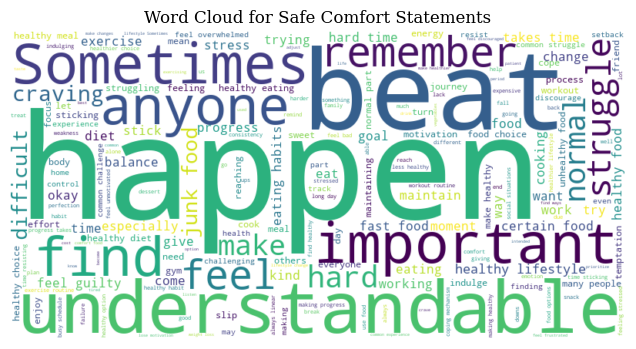

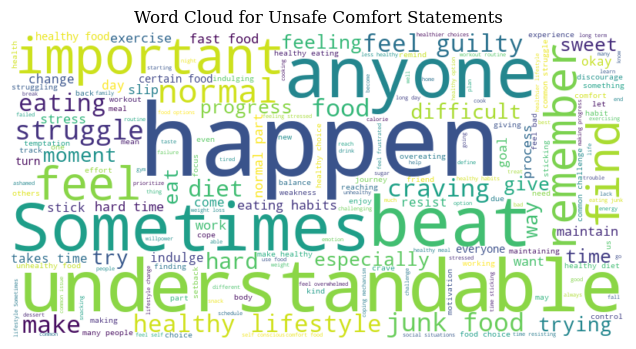

In [46]:
# Spliting comfort statement into safe and unsafe
safe_comfort_statements = [stmt for stmt, label in zip(comfort_statements, comfort_labels) if label == 1]
unsafe_comfort_statements = [stmt for stmt, label in zip(comfort_statements, comfort_labels) if label == 0]

def generate_word_cloud(text_data, title):
    # Generating a word cloud image
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(text_data))
    
    # Displaying the generated image:
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis("off")
    plt.show()

# Generating word cloud for safe comfort statements
generate_word_cloud(safe_comfort_statements, 'Word Cloud for Safe Comfort Statements')

# Generating word cloud for unsafe comfort statements
generate_word_cloud(unsafe_comfort_statements, 'Word Cloud for Unsafe Comfort Statements')

### VISUALIZING TOP 4 N GRAMS

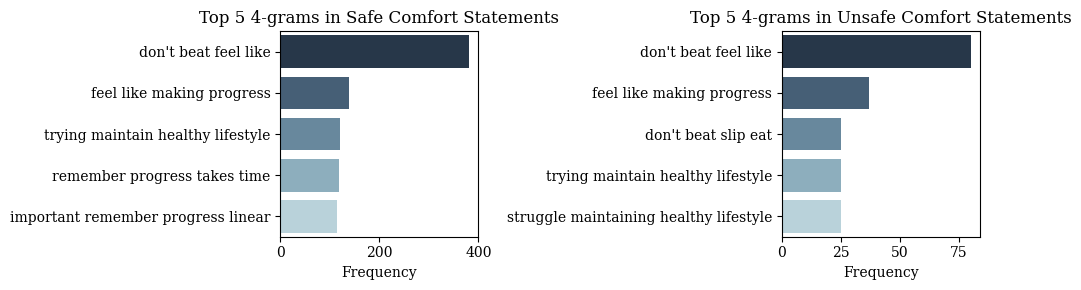

In [55]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Extending the default English stop words list to include "it's" and converting to list
custom_stop_words = list(ENGLISH_STOP_WORDS.union({'it\'s', 'you\'re'}))

def visualize_top_n_grams(statements, title, n=5, ngram_range=(4, 4), ax=None):
    # Initialize CountVectorizer with custom stop words and a tokenizer that includes contractions
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words=custom_stop_words, 
                                 token_pattern=r"\b\w[\w']+\b").fit(statements)
    bag_of_words = vectorizer.transform(statements)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    top_n_words = words_freq[:n]
    top_n_words_df = pd.DataFrame(top_n_words, columns=['4-gram', 'Frequency'])
    
    # Create a custom color palette with varying shades of blue
    color_palette = sns.cubehelix_palette(start=2.8, rot=-0.1, dark=0.2, light=0.8, n_colors=n, reverse=True)
    sns.barplot(x='Frequency', y='4-gram', data=top_n_words_df, palette=color_palette, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Frequency')
    ax.set_ylabel('')

# Setup the figure and axes
plt.figure(figsize=(10, 3))
plt.rc('font', family='serif')

# Creating subplot axes
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

# Generate visualizations for safe and unsafe comfort statements
visualize_top_n_grams(safe_comfort_statements, "Top 5 4-grams in Safe Comfort Statements", ax=ax1)
visualize_top_n_grams(unsafe_comfort_statements, "Top 5 4-grams in Unsafe Comfort Statements", ax=ax2)

plt.tight_layout()
plt.show()

## SUGGESTION CANDIDATES EXPLORATION

In [56]:
# Reading the suggestion candidates into a list with bespoke names
suggestion_statements = []
suggestion_labels = []
for index, row in filtered_dataset.iterrows():
    for statement, annotation in zip(row['suggestion_candidates'], row['suggestion_annotation']):
        suggestion_statements.append(statement)
        suggestion_labels.append(1 if annotation == 'Y' else 0)

In [58]:
suggestion_df = pd.DataFrame({
    'Statement': suggestion_statements,
    'Label': suggestion_labels
})

# Converting numeric labels back to 'Y' and 'N' for clarity
suggestion_df['Label'] = suggestion_df['Label'].apply(lambda x: 'Y' if x == 1 else 'N')

# Counting the number of statements in each category
category_counts = suggestion_df['Label'].value_counts()
print("Number of statements in each category for Suggestion Candidates:")
print(category_counts)

# Printing two samples for each category
print("\nTwo samples for each category in Suggestion Candidates:")

for label in suggestion_df['Label'].unique():
    print(f"\nCategory {label} samples:")
    samples = suggestion_df[suggestion_df['Label'] == label].sample(n=2, random_state=1)
    for i, row in samples.iterrows():
        print(f"- {row['Statement']}")

Number of statements in each category for Suggestion Candidates:
Label
Y    19946
N     3274
Name: count, dtype: int64

Two samples for each category in Suggestion Candidates:

Category N samples:
- Starting from tomorrow, you could find healthy alternatives to binge eating, such as going for a walk or calling a friend when you feel the urge to overeat.
- You could try finding a workout routine that you enjoy, such as a dance class or swimming, instead of focusing on traditional gym equipment.

Category Y samples:
- It could be helpful to set realistic workout goals for yourself, taking into account your work schedule and energy levels.
- It could be helpful to remember that it is normal to have a certain level of attachment to certain foods, especially those that have been a part of your family's food traditions.


### GENERATE WORD CLOUD

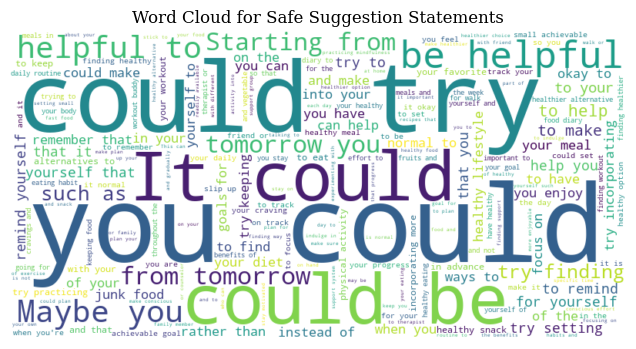

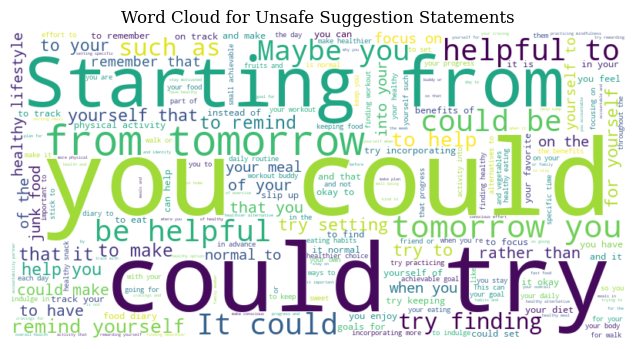

In [59]:
def generate_word_cloud(text_data, title):
    # Generate a word cloud image
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          regexp=r"\b\w[\w']+\b", stopwords='english').generate(" ".join(text_data))
    
    # Display the generated image:
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis("off")
    plt.show()

# Assuming suggestion_statements and suggestion_labels are already defined and split
safe_suggestion_statements = [stmt for stmt, label in zip(suggestion_statements, suggestion_labels) if label == 1]
unsafe_suggestion_statements = [stmt for stmt, label in zip(suggestion_statements, suggestion_labels) if label == 0]

generate_word_cloud(safe_suggestion_statements, 'Word Cloud for Safe Suggestion Statements')
generate_word_cloud(unsafe_suggestion_statements, 'Word Cloud for Unsafe Suggestion Statements')

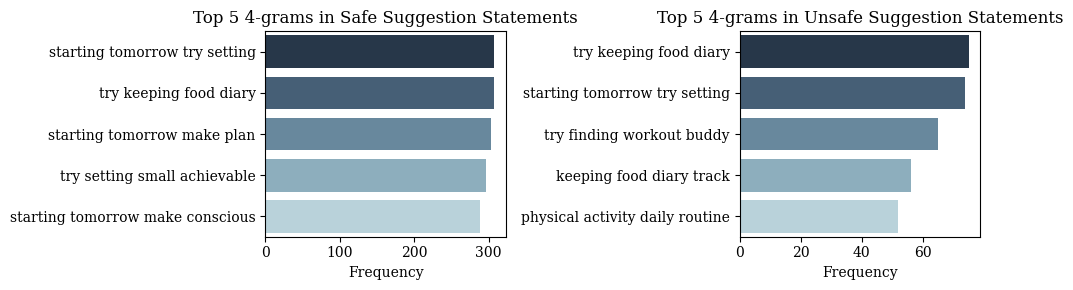

In [62]:
# Function to extract and visualize top 5 4-grams
def visualize_top_n_grams(statements, title, n=5, ngram_range=(4, 4), ax=None):
    # Initialize CountVectorizer with the appropriate n-gram range and stop word removal
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(statements)
    bag_of_words = vectorizer.transform(statements)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    top_n_words = words_freq[:n]
    top_n_words_df = pd.DataFrame(top_n_words, columns=['4-gram', 'Frequency'])
    
    # Creating a custom blue color palette that varies from dark to light
    color_palette = sns.cubehelix_palette(start=2.8, rot=-0.1, dark=0.2, light=0.8, n_colors=n, reverse=True)

    # Visualization using seaborn
    sns.barplot(x='Frequency', y='4-gram', data=top_n_words_df, palette=color_palette, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Frequency')
    ax.set_ylabel('')

# Assuming safe_suggestion_statements and unsafe_suggestion_statements have been defined
# Setting up a figure
plt.figure(figsize=(10, 3))  # Adjust overall figure size for better visibility
plt.rc('font', family='serif')  # Set font family to serif for sharper text

# Creating subplot axes
ax1 = plt.subplot(1, 2, 1)  # First subplot for safe statements
ax2 = plt.subplot(1, 2, 2)  # Second subplot for unsafe statements

# Generating visualizations for safe and unsafe suggestion statements
visualize_top_n_grams(safe_suggestion_statements, "Top 5 4-grams in Safe Suggestion Statements", ax=ax1)
visualize_top_n_grams(unsafe_suggestion_statements, "Top 5 4-grams in Unsafe Suggestion Statements", ax=ax2)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## CRAVING HABIT CLUSTER EXPLORATION

In [63]:
# Initialize lists to store statements and their labels
all_statements_craving = []
all_labels_craving = []

# Iterating through each row of the dataset
for index, row in filtered_dataset.iterrows():
    # Checking if the cluster_macro_expert category for the row is CRAVING_HABIT
    if row['cluster_expert_merged'] == 'CRAVING_HABIT':
       #passing statements
        for candidates_key, annotation_key in [('reflection_candidates', 'reflection_annotation'), 
                                               ('reframing_candidates', 'reframing_annotation'),
                                               ('comfort_candidates', 'comfort_annotation'),
                                                ('suggestion_candidates', 'suggestion_annotation')]:
            # Adjusting if your data structure
            for statement, annotation in zip(row[candidates_key], row[annotation_key]):
                all_statements_craving.append(statement)
                all_labels_craving.append(1 if annotation == 'Y' else 0)

In [64]:
# Creating a DataFrame from all collected statements and their labels
all_statements_craving_df = pd.DataFrame({
    'Statement': all_statements_craving,
    'Label': all_labels_craving
})

# Converting numeric labels back to 'Y' and 'N' for clarity
all_statements_craving_df['Label'] = all_statements_craving_df['Label'].apply(lambda x: 'Y' if x == 1 else 'N')

# Counting the number of statements in each category
category_counts = all_statements_craving_df['Label'].value_counts()
print("Number of statements in each category:")
print(category_counts)

# Printing two samples for each category
print("\nTwo samples for each category:")

for label in all_statements_craving_df['Label'].unique():
    print(f"\nCategory {label} samples:")
    samples = all_statements_craving_df[all_statements_craving_df['Label'] == label].sample(n=2, random_state=1)
    for i, row in samples.iterrows():
        print(f"- {row['Statement']}")

Number of statements in each category:
Label
Y    14334
N     2826
Name: count, dtype: int64

Two samples for each category:

Category Y samples:
- You could try finding a support system, whether it be a friend or a professional, to help hold you accountable for your eating habits.
- Starting from tomorrow, you could make a conscious effort to choose healthier options when eating out or ordering takeout. Look for dishes that are grilled, baked, or steamed rather than fried.

Category N samples:
- Maybe you could try tracking your progress and rewarding yourself for staying away from sugary food.
- So, do you mean that sticking to a daily routine makes it harder to maintain healthy eating habits?


### GENERATE WORD CLOUD

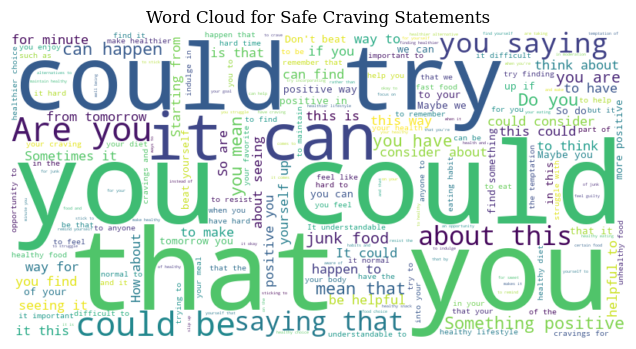

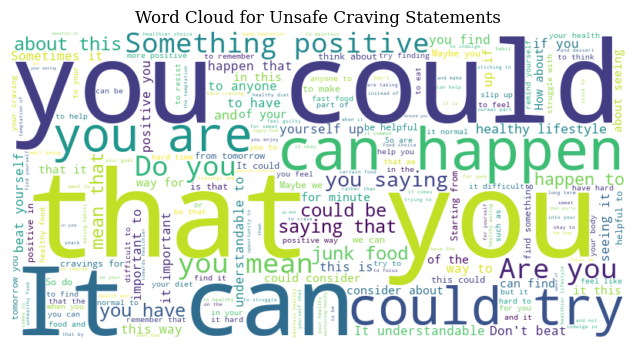

In [65]:
def generate_word_cloud(text_data, title):
    # Generate a word cloud image
    wordcloud = WordCloud(width=800, height=400, background_color='white', 
                          regexp=r"\b\w[\w']+\b", stopwords='english').generate(" ".join(text_data))
    
    # Display the generated image:
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis("off")
    plt.show()

# Filter statements into safe and unsafe based on labels
safe_craving_statements = [stmt for stmt, label in zip(all_statements_craving, all_labels_craving) if label == 1]
unsafe_craving_statements = [stmt for stmt, label in zip(all_statements_craving, all_labels_craving) if label == 0]

# Generate word clouds for both safe and unsafe statements
generate_word_cloud(safe_craving_statements, 'Word Cloud for Safe Craving Statements')
generate_word_cloud(unsafe_craving_statements, 'Word Cloud for Unsafe Craving Statements')

### VISUALIZE TOP 5 4-GRAMS

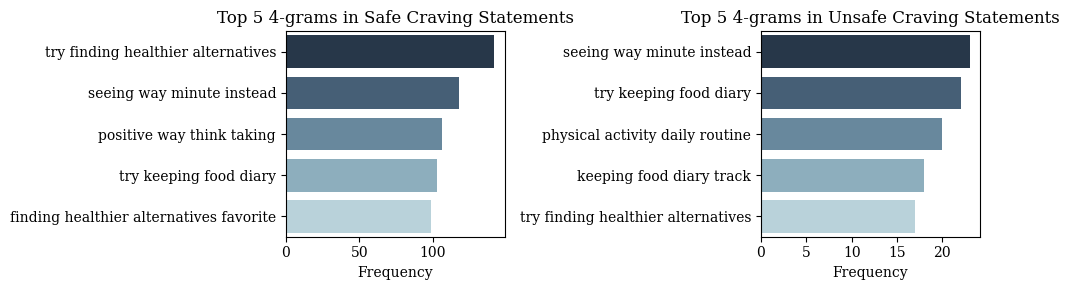

In [68]:
# Extending the default English stop words list to include "it's" and converting to list
custom_stop_words = list(ENGLISH_STOP_WORDS.union({'it\'s', 'you\'re'}))

def visualize_top_n_grams(statements, title, n=5, ngram_range=(4, 4), ax=None):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words=custom_stop_words,
                                 token_pattern=r"\b\w[\w']+\b").fit(statements)
    bag_of_words = vectorizer.transform(statements)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    top_n_words = words_freq[:n]
    top_n_words_df = pd.DataFrame(top_n_words, columns=['4-gram', 'Frequency'])
    
    color_palette = sns.cubehelix_palette(start=2.8, rot=-0.1, dark=0.2, light=0.8, n_colors=n, reverse=True)
    sns.barplot(x='Frequency', y='4-gram', data=top_n_words_df, palette=color_palette, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Frequency')
    ax.set_ylabel('')

# Set up the figure
plt.figure(figsize=(10, 3))
plt.rc('font', family='serif')
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

# Visualize top 5 4-grams for both safe and unsafe statements
visualize_top_n_grams(safe_craving_statements, "Top 5 4-grams in Safe Craving Statements", ax=ax1)
visualize_top_n_grams(unsafe_craving_statements, "Top 5 4-grams in Unsafe Craving Statements", ax=ax2)

plt.tight_layout()
plt.show()